In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv('creditcard.csv')

In [4]:
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(df.shape)

(284807, 31)


In [6]:
print(df[['Amount','Time','Class']].describe())

              Amount           Time          Class
count  284807.000000  284807.000000  284807.000000
mean       88.349619   94813.859575       0.001727
std       250.120109   47488.145955       0.041527
min         0.000000       0.000000       0.000000
25%         5.600000   54201.500000       0.000000
50%        22.000000   84692.000000       0.000000
75%        77.165000  139320.500000       0.000000
max     25691.160000  172792.000000       1.000000


In [7]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
print(df.columns)# all the coluimns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
print(df.isna().any())  # gives true /false

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [12]:
#to find null values and their percentage

null_columns=pd.DataFrame({'Columns':df.isna().sum().index,
                           'No. Null values':df.isna().sum().values,
                         'Percentage':df.isna().sum().values})#/df.shape[0]})
                           


In [13]:
print(null_columns)

   Columns  No. Null values  Percentage
0     Time                0           0
1       V1                0           0
2       V2                0           0
3       V3                0           0
4       V4                0           0
5       V5                0           0
6       V6                0           0
7       V7                0           0
8       V8                0           0
9       V9                0           0
10     V10                0           0
11     V11                0           0
12     V12                0           0
13     V13                0           0
14     V14                0           0
15     V15                0           0
16     V16                0           0
17     V17                0           0
18     V18                0           0
19     V19                0           0
20     V20                0           0
21     V21                0           0
22     V22                0           0
23     V23                0           0


In [14]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [15]:
#Percentage of total not fraud transaction

nfcount=0
notFraud=df['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount    
per_nf=(nfcount/len(notFraud))*100
print('percentage of total not fraud transaction in the dataset: ',per_nf)


percentage of total not fraud transaction in the dataset:  99.82725143693798


In [16]:
#Percentage of total fraud transaction

fcount=0
Fraud=df['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount    
per_f=(fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset: ',per_f)


percentage of total fraud transaction in the dataset:  0.1727485630620034


In [17]:
df=pd.DataFrame()
df['Fraud Transaction']=Fraud
df['Genuine Transaction']=notFraud
print(df)

        Fraud Transaction  Genuine Transaction
0                       0                    0
1                       0                    0
2                       0                    0
3                       0                    0
4                       0                    0
...                   ...                  ...
284802                  0                    0
284803                  0                    0
284804                  0                    0
284805                  0                    0
284806                  0                    0

[284807 rows x 2 columns]


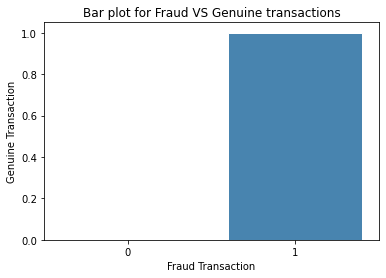

In [22]:
plt.title("Bar plot for Fraud VS Genuine transactions")
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = df,
            palette = 'Blues', edgecolor = 'w')

plt.show()

#As per the graph we can say the ratio of genuine transactions are higher than fraud transactions.



In [46]:
x=df['Amount']
y=df['Time']
plt.plot(x, y) 
plt.title('Time Vs Amount') 
sns.barplot(x = x, y = y, data = df)#, palette = 'Blues', edgecolor = 'w')
plt.show()
#the number high amount transactions are very low. So there is a high probability for huge transactions to be fraudulent .
 

KeyError: 'Amount'

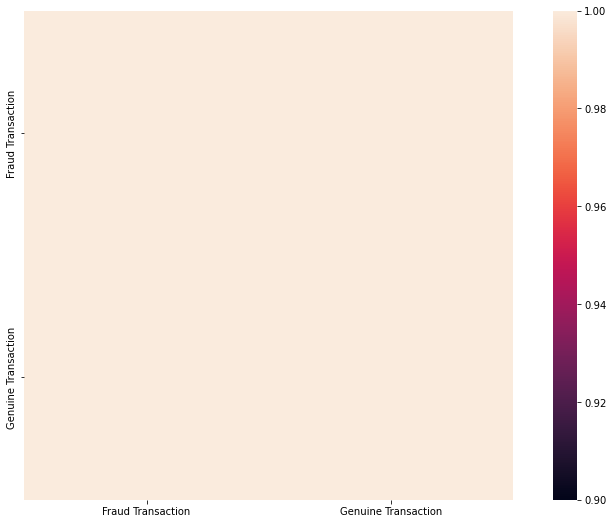

In [28]:
# Correlation matrix 
correlation_metrics = df.corr() 
fig = plt.figure(figsize = (14, 9)) 
sns.heatmap(correlation_metrics, vmax = .9, square = True) 
plt.show() 


In [29]:
#model development
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

lr=LogisticRegression()

In [30]:
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=lr.predict(x_test)
print("predicted values:",y_pred)

predicted values: [1 0 0 ... 0 0 0]


In [32]:
print("score is:",lr.score(x_test,y_test))

score is: 1.0


In [35]:
print("Taining score:",lr.score(x_train,y_train))
print("Testing score:",lr.score(x_test,y_test))

Taining score: 1.0
Testing score: 1.0


In [33]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[56864     0]
 [    0    98]]


In [36]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred)*100)


accuracy: 100.0
